# Age Estimation

In [0]:
import os
import numpy as np
import torch
from helperT import *

# Loading Data

PyTorch Datasets are objects that have a single job: to return a single datapoint on request. The exact form of the datapoint varies between tasks: it could be a single image, a slice of a time series, a tabular record or something else entirely. These are then passed on to a Dataloader which handles batching of datapoints and parallelism. 

We've written the dataloader function and transform function for you. `get_dataloaders()` will return three object: train_loader, val loader and test_loader.

```
Arguments:
    None
Return:
    train_loader      -- tensor,(y, x), [(32),(32, 2048)] 
    val_loader        -- tensor,(y, x), [(32),(32, 2048)] 
    test_loader       -- tensor,(y, x), [(32),(32, 2048)] 
```

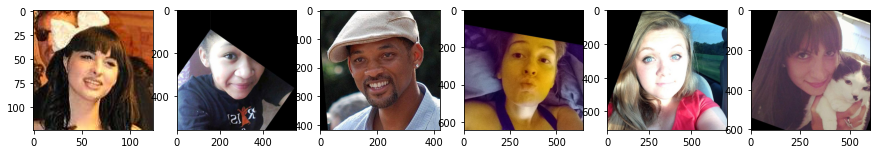

In [3]:
train_loader, val_loader, test_loader = get_dataloaders("DATASET/")
show_data('DATASET/')

# Define Model
In this part, we will define our linear regression model here. First let's declare a class called `LinearClassifier` that inherit from `torch.nn.moudle`. Then you have to define the initialization in `__init__`, and define forward propogation in `forward` function.
Hint: You can use torch.nn.Linear.
```
Arguments:
    __init__        --(input_size, output_size)
Return:
    out      -- tensor, network calculation results 
```


In [0]:
class LinearClassifier(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(LinearClassifier, self).__init__()
        #############################################
        # TODO: YOUR CODE HERE
        ############################################# 
        self.linear = None

    def forward(self, x):
        #############################################
        # TODO: YOUR CODE HERE
        ############################################# 
        out = None
        return out

In [ ]:
## Test ##
model = LinearClassifier(10, 2)
x = torch.zeros((5, 10))
y = model(x)
assert y.shape[0] == 5
assert y.shape[1] == 2
print('test passed')

# softmax + CELoss

=> [epoch 0001] mae: 9.38542 loss: 3.774
=> [epoch 0002] mae: 7.12036 loss: 3.533
=> [epoch 0003] mae: 6.29760 loss: 3.428
=> [epoch 0004] mae: 5.87998 loss: 3.366
=> [epoch 0005] mae: 5.63197 loss: 3.324
=> [epoch 0006] mae: 5.46819 loss: 3.295
=> [epoch 0007] mae: 5.35406 loss: 3.273
=> [epoch 0008] mae: 5.27129 loss: 3.257
=> [epoch 0009] mae: 5.20640 loss: 3.245
=> [epoch 0010] mae: 5.15434 loss: 3.236
=> [epoch 0011] mae: 5.11270 loss: 3.229
=> [epoch 0012] mae: 5.07940 loss: 3.223
=> [epoch 0013] mae: 5.05202 loss: 3.219
=> [epoch 0014] mae: 5.02902 loss: 3.216
=> [epoch 0015] mae: 5.00952 loss: 3.213
=> [epoch 0016] mae: 4.99360 loss: 3.211
=> [epoch 0017] mae: 4.97994 loss: 3.209
=> [epoch 0018] mae: 4.96807 loss: 3.208
=> [epoch 0019] mae: 4.95754 loss: 3.207
=> [epoch 0020] mae: 4.94844 loss: 3.206
=> [epoch 0021] mae: 4.94022 loss: 3.206
=> [epoch 0022] mae: 4.93294 loss: 3.205
=> [epoch 0023] mae: 4.92631 loss: 3.205
=> [epoch 0024] mae: 4.92021 loss: 3.206
=> [epoch 0025] 

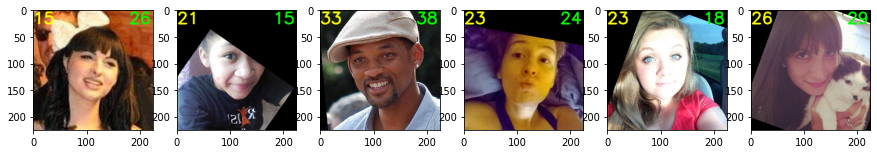

In [5]:
def train_softmax_cel():
    # Define model
    model = None
    
    # Define SGD optimizer to update our weights and bias
    optimizer = None
    
    # Define criterion to calculate loss
    criterion = None

    for e in range(EPOCH):
        # Training model
        model.train()

        for i, (y, x) in enumerate(train_loader):
            #############################################
            # TODO: YOUR CODE HERE
            #############################################
            x, y = x.cuda().float(), y.cuda().long() 
            # calculate the gradient and update the model

       # Validating model
        model.eval()
        gt = []
        preds = []

        for i, (y, x) in enumerate(val_loader):
            #############################################
            # TODO: YOUR CODE HERE
            ############################################# 
            # Calculate the validation outputs and error
            x, y = x.cuda().float(), y.cuda().long()  
            outputs = None

            # Save the predictions for validation sets and ground truth
            preds.append(F.softmax(outputs, dim=-1).cpu().detach().numpy())
            gt.append(y.cpu().numpy())

        # Change prediction and ground truth to numpy
        preds = np.concatenate(preds, axis=0)
        gt = np.concatenate(gt, axis=0)

        # Calculate difference and mae
        diff = preds - gt
        mae = np.abs(diff).mean()
        
    print("=> training finished")
    return model, preds, gt

model_softmax_cel, preds, gt = train_softmax_cel()
show_results(preds, gt)

# Test and Generate results file

In [6]:
prediction = test_cel(model_softmax_cel, test_loader, "softmax_cel.txt")
print("Test results has saved to softmax_cel.txt")
print(prediction[:10])

Test results has saved to linear_cel.txt
[25.88871402 62.04957082 50.202242   21.0749963  31.14978446 35.07419064
 47.24547161 40.99436595 21.97386793 58.36446169]
